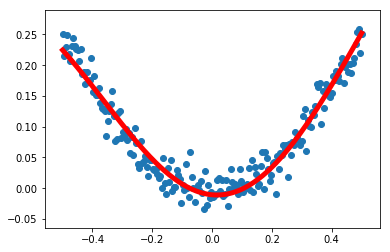

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

weight_L1 = tf.Variable(tf.random_normal([1,10]))
bias_L1 = tf.Variable(tf.zeros([1,10]))
wplusb_L1 = tf.matmul(x,weight_L1)+ bias_L1
L1_output = tf.nn.tanh(wplusb_L1)

weight_L2 = tf.Variable(tf.random_normal([10,1]))
bias_L2 = tf.Variable(tf.zeros([1,1]))
wplusb_L2 = tf.matmul(L1_output,weight_L2)+ bias_L2
L2_output = tf.nn.tanh(wplusb_L2)

loss = tf.reduce_mean(tf.square(y - L2_output))
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range (2000):
        sess.run(optimizer, feed_dict = {x: x_data, 
                                     y: y_data})
    predicted_value = sess.run(L2_output, feed_dict={x: x_data})
    
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data, predicted_value, 'r-',lw= 5)
    plt.show()
        

                        